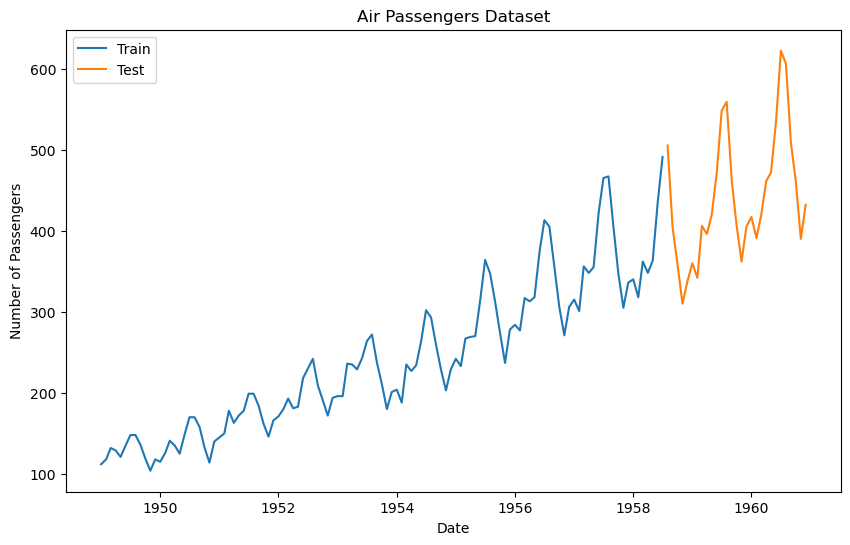

/Users/akash/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/akash/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/akash/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/akash/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/akash/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provid

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -524.549
Date:                Fri, 01 Mar 2024   AIC                           1061.098
Time:                        23:14:21   BIC                           1077.515
Sample:                    01-01-1949   HQIC                          1067.760
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3558      0.092      3.854      0.000       0.175       0.537
ar.L2         -0.2644      0.109     -2.422      0.015      -0.478      -0.050
ar.L3          0.0847      0.078      1.089      0.2

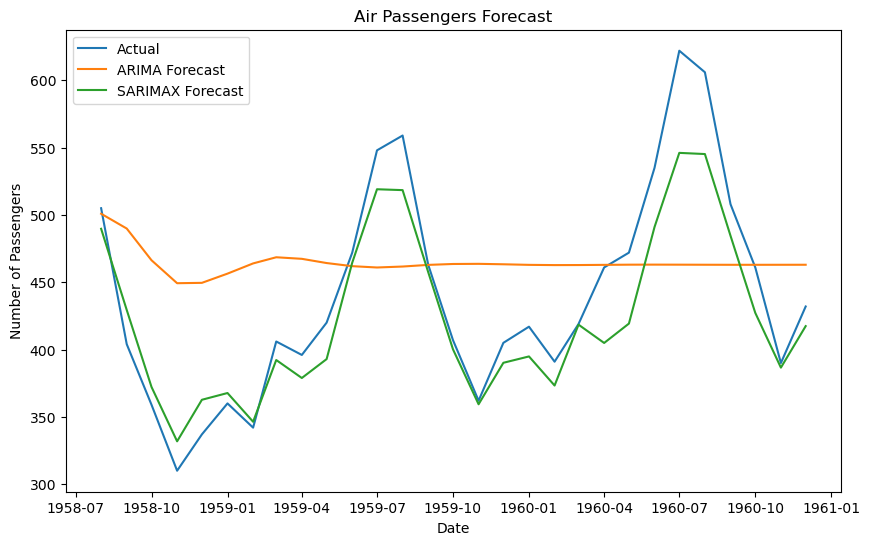

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the Air Passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Air Passengers Dataset')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# ARIMA model
model_arima = ARIMA(train, order=(5,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())


# SARIMAX model
model_sarimax = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.summary())


# Forecast using ARIMA
forecast_arima = model_arima_fit.forecast(steps=len(test))
rmse_arima = calculate_rmse(test, forecast_arima)
print(f'ARIMA RMSE: {rmse_arima}')

# Forecast using SARIMAX
forecast_sarimax = model_sarimax_fit.forecast(steps=len(test))
rmse_sarimax = calculate_rmse(test, forecast_sarimax)
print(f'SARIMAX RMSE: {rmse_sarimax}')

# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.plot(test.index, forecast_sarimax, label='SARIMAX Forecast')
plt.title('Air Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
